In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,OneHotEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization, LSTM, SpatialDropout1D,Bidirectional, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, optimizers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

2024-03-29 23:22:09.578697: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-29 23:22:09.578736: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-29 23:22:09.578765: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-29 23:22:09.585332: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os
for dirname, _, filenames in os.walk(r"C:\Users\robin\Documents\All Projects\Projects\Cyber Atacks Prediction on CICIDS and UNSW datasets\UNSW_NB15"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train = pd.read_csv(r"../unsw_dataset/UNSW_NB15_training-set.csv")
test = pd.read_csv(r"../unsw_dataset/UNSW_NB15_testing-set.csv")


In [3]:
train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [4]:
test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [3]:
df = pd.concat([train,test])

In [4]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt 

In [6]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [7]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)  

In [8]:
print(df.duplicated().sum(), "fully duplicate rows to remove")

0 fully duplicate rows to remove


In [9]:
df_encoded = df.copy()

le = LabelEncoder()

df_encoded['attack_cat'] = le.fit_transform(df['attack_cat'])

X = df_encoded.drop('attack_cat', axis=1)
y = df_encoded['attack_cat']

In [10]:
X = df.drop('attack_cat', axis=1)
y = df['attack_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
print(y_train.value_counts())

attack_cat
Normal            74400
Generic           47097
Exploits          35620
Fuzzers           19397
DoS               13082
Reconnaissance    11189
Analysis           2142
Backdoor           1863
Shellcode          1209
Worms               139
Name: count, dtype: int64


In [12]:

# One-hot encode categorical features
categorical_columns = ['proto', 'service', 'state']  
X = pd.get_dummies(df.drop('attack_cat', axis=1), columns=categorical_columns)
y = df['attack_cat']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for Conv1D if necessary
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

encoder = OneHotEncoder(sparse_output=False)
y_train_one_hot = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.values.reshape(-1, 1))


## CNN without Finetuning

In [14]:
import tensorflow as tf

gpu_device = '/device:GPU:1'

In [15]:
with tf.device(gpu_device):

    cnn_without_finetuning = Sequential()

    # First Convolutional Layer
    cnn_without_finetuning.add(Conv1D(32, 3, activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(X_train_scaled.shape[1], 1)))
    cnn_without_finetuning.add(Conv1D(32, 3, activation='relu', padding='same', kernel_initializer='he_uniform'))
    cnn_without_finetuning.add(MaxPooling1D(pool_size=2, strides=2))
    cnn_without_finetuning.add(Dropout(0.002))
    cnn_without_finetuning.add(BatchNormalization())

    # Second Convolutional Layer
    cnn_without_finetuning.add(Conv1D(64, 3, activation='relu', padding='same', kernel_initializer='he_uniform'))
    cnn_without_finetuning.add(Conv1D(64, 3, activation='relu', padding='same', kernel_initializer='he_uniform'))
    cnn_without_finetuning.add(MaxPooling1D(pool_size=2, strides=2))
    cnn_without_finetuning.add(Dropout(0.002))
    cnn_without_finetuning.add(BatchNormalization())

    # Flatten and Dense Layers
    cnn_without_finetuning.add(Flatten())
    cnn_without_finetuning.add(Dense(32, activation='relu'))
    cnn_without_finetuning.add(Dense(y_train_one_hot.shape[1], activation='softmax'))  # Number of neurons equals the number of classes

    # Compile the model
    cnn_without_finetuning.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit the model
    history = cnn_without_finetuning.fit(X_train_scaled, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test_one_hot))

Epoch 1/10


2024-03-29 23:23:28.905698: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-03-29 23:23:30.037759: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x19d14ff0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-29 23:23:30.037803: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100 80GB PCIe, Compute Capability 8.0
2024-03-29 23:23:30.037817: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA A100 80GB PCIe, Compute Capability 8.0
2024-03-29 23:23:30.047938: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-29 23:23:30.167415: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-03-29 23:23:31.090860: 

6442/6442 [==============================] - ETA: 0s - loss: 0.4137 - accuracy: 0.8526

2024-03-29 23:24:21.683038: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_1_bfc) ran out of memory trying to allocate 855.13MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-29 23:24:22.020719: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_1_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-29 23:24:22.020795: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_1_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-29 23:24:22.053798: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (G

6442/6442 [==============================] - 58s 9ms/step - loss: 0.4137 - accuracy: 0.8526 - val_loss: 0.3701 - val_accuracy: 0.8633
Epoch 2/10
  15/6442 [..............................] - ETA: 51s - loss: 0.3684 - accuracy: 0.8771

2024-03-29 23:24:26.007510: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_1_bfc) ran out of memory trying to allocate 774.62MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-29 23:24:26.007564: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_1_bfc) ran out of memory trying to allocate 774.62MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-29 23:24:26.033830: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_1_bfc) ran out of memory trying to allocate 658.69MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


6442/6442 [==============================] - 55s 9ms/step - loss: 0.3715 - accuracy: 0.8625 - val_loss: 0.3624 - val_accuracy: 0.8628
Epoch 3/10
6442/6442 [==============================] - 54s 8ms/step - loss: 0.3586 - accuracy: 0.8656 - val_loss: 0.3476 - val_accuracy: 0.8682
Epoch 4/10
6442/6442 [==============================] - 42s 7ms/step - loss: 0.3495 - accuracy: 0.8674 - val_loss: 0.3408 - val_accuracy: 0.8706
Epoch 5/10
6442/6442 [==============================] - 40s 6ms/step - loss: 0.3429 - accuracy: 0.8691 - val_loss: 0.3605 - val_accuracy: 0.8618
Epoch 6/10
6442/6442 [==============================] - 39s 6ms/step - loss: 0.3370 - accuracy: 0.8706 - val_loss: 0.3503 - val_accuracy: 0.8654
Epoch 7/10
6442/6442 [==============================] - 42s 7ms/step - loss: 0.3322 - accuracy: 0.8718 - val_loss: 0.3277 - val_accuracy: 0.8734
Epoch 8/10
6442/6442 [==============================] - 40s 6ms/step - loss: 0.3290 - accuracy: 0.8727 - val_loss: 0.3273 - val_accuracy: 0.8

In [17]:
with tf.device(gpu_device):
    test_loss, test_accuracy = cnn_without_finetuning.evaluate(X_test_scaled, y_test_one_hot)

    print("Test Accuracy: {: .2f}%".format(test_accuracy * 100))
    print("Test Loss: {:.2f}%".format(test_loss * 100))

1611/1611 [==============================] - 5s 3ms/step - loss: 0.3260 - accuracy: 0.8738
Test Accuracy:  87.38%
Test Loss: 32.60%


In [18]:
y_true = np.argmax(y_test_one_hot, axis=1)


In [20]:
from sklearn.metrics import classification_report
import numpy as np
with tf.device(gpu_device):

    y_pred = cnn_without_finetuning.predict(X_test_scaled)
    y_pred_classes = np.argmax(y_pred, axis=1)

    class_names = np.unique(y_test)

    # Classification report
    report = classification_report(y_true, y_pred_classes, target_names=class_names)
    print(report)

1611/1611 [==============================] - 2s 983us/step
                precision    recall  f1-score   support

      Analysis       0.67      0.21      0.32       538
      Backdoor       0.37      0.04      0.07       471
           DoS       0.54      0.03      0.06      3293
      Exploits       0.60      0.94      0.74      8853
       Fuzzers       0.91      0.83      0.87      4742
       Generic       1.00      0.98      0.99     11849
        Normal       1.00      1.00      1.00     18675
Reconnaissance       0.85      0.76      0.81      2770
     Shellcode       0.64      0.56      0.60       318
         Worms       0.50      0.12      0.19        26

      accuracy                           0.87     51535
     macro avg       0.71      0.55      0.56     51535
  weighted avg       0.87      0.87      0.85     51535



In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true, y_pred_classes)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')


Precision: 0.8746836342198733
Recall: 0.8737557000097022
F1 Score: 0.8503105072722383
Accuracy: 0.8737557000097022


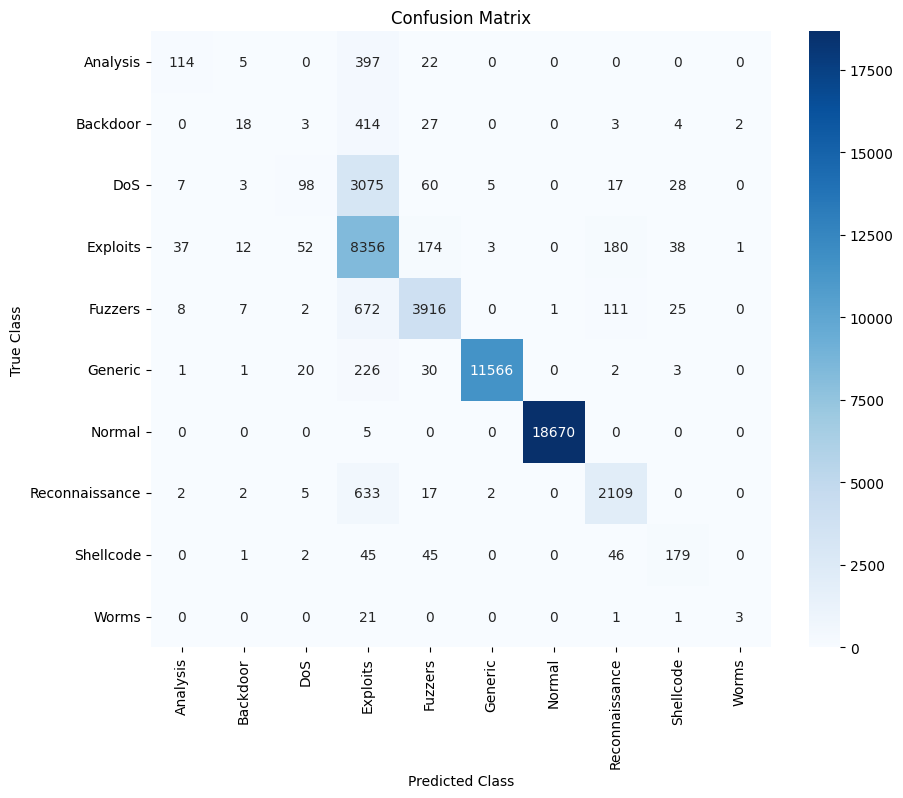

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

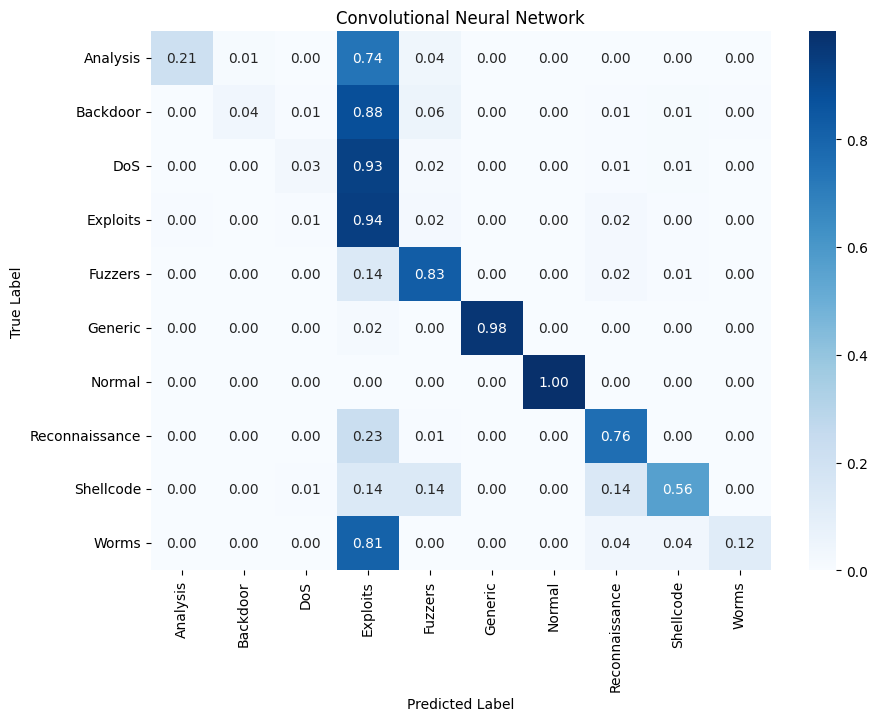

In [23]:
# Normalize the confusion matrix by rows
row_sums = conf_matrix.sum(axis=1)
conf_matrix_normalized = conf_matrix / row_sums[:, np.newaxis]

# Plot the normalized confusion matrixa
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap='Blues',xticklabels=le.classes_, yticklabels=le.classes_)  # Use fmt=".2f" to format the numbers
plt.title("Convolutional Neural Network")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support


precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true, y_pred_classes)

precision_micro, recall_micro, f1_score_micro, _ = precision_recall_fscore_support(y_true, y_pred_classes, average='macro')
print(f"Micro Average Precision: {precision_micro:.4f}")
print(f"Micro Average Recall: {recall_micro:.4f}")
print(f"Micro Average F1-Score: {f1_score_micro:.4f}")

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')


Micro Average Precision: 0.7094
Micro Average Recall: 0.5465
Micro Average F1-Score: 0.5632
Precision: 0.8746836342198733
Recall: 0.8737557000097022
F1 Score: 0.8503105072722383
Accuracy: 0.8737557000097022
